In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import matplotlib.font_manager as fm

font_dir = ['C:\\Users\\david\\OneDrive - Drexel University\\\Documents\\Helvetica']
font_dir = ['/Users/darioradecic/Downloads/Merriweather']
for font in fm.findSystemFonts(font_dir):
    fm.fontManager.addfont(font)

#mpl.rc('font', family='Helvetica')
mpl.rc('font', family='CF Helvetica-Regular', size=11)

mpl.rc('figure', figsize=(3.0,2.0))
mpl.rc('savefig', dpi=800)
mpl.rc('lines', linewidth=1.2)
mpl.rc('axes', grid=True, facecolor='white')
mpl.rc('grid', linewidth=0.25)
mpl.rc('mathtext', fontset="dejavusans")
mpl.rc('xtick.minor', visible=True, size=1.5, width=0.5)
mpl.rc('ytick.minor', visible=True, size=1.5, width=0.5)
plt.rcParams['figure.constrained_layout.use'] =  True

In [2]:
o = pd.read_csv("omega.csv", header=None, delimiter="\t")
t = pd.read_csv("theta.csv", header=None, delimiter=",")
tf = np.polyfit(t[0], t[1], 3)
of = np.polyfit(o[0], o[1], 2)
of2 = [3*tf[0], 2*tf[1], tf[2]]

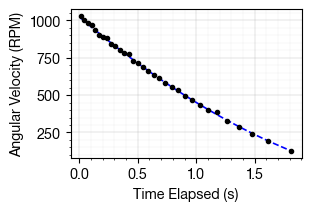

In [3]:
plt.grid(which="minor", axis="both", linewidth=0.2, alpha=0.33)
RPM = 30/np.pi
plt.plot(o[0], np.polyval(of2,o[0])*RPM, "--", color="blue")
plt.plot(o[0], o[1]*RPM, "k.")
plt.ylabel("Angular Velocity (RPM)")

plt.xlabel("Time Elapsed (s)")
plt.savefig("figs\\bearing_RPM.svg",facecolor="None")

In [4]:
I = 0.00039205
a = lambda w: 2*np.sqrt(tf[1]**2-3*tf[0]*(tf[2]-w))
T = lambda w: I*a(w)

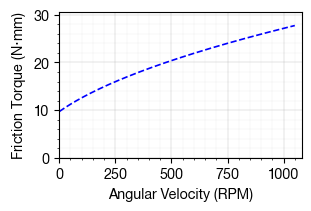

In [5]:
W = np.arange(0, 110,0.1)

fig = plt.figure()
ax = fig.subplots(1,1)
ax.grid(which="minor", axis="both", linewidth=0.2, alpha=0.33)
ax.patch.set_alpha(1)
ax.patch.set_visible(True)
ax.patch.set_fill(True)
ax.plot(W*RPM,T(W)*1e3, "--", color="blue")
plt.ylim(0,.0305*1e3)
plt.xlim(0,1080)
plt.xlabel("Angular Velocity (RPM)")
plt.ylabel("Friction Torque (N$\cdot$mm)")
fig.savefig("figs\\bearing_torque.svg",facecolor="None")